In [1]:
import pandas as pd
import numpy as np
import cPickle as pickle
from random import shuffle
from tqdm import tqdm
# import matplotlib.pyplot as plt
import random
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd

import evaluate_plot as eval_plot
import batchify as batchify
import vdbm as dbm
from sklearn.metrics import precision_recall_fscore_support
from collections import Counter

import os
# 1 starts the process on GPU-0
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
torch.__version__

'0.4.0'

In [2]:
data = pickle.load(open('../../Data/final_osaka_data_avg_60_flags.pkl','rb'))

In [3]:
# # This is just for testing
# data['train_ids'] = data['train_ids'][:40]
# data['val_ids'] = data['val_ids'][:40]
# data['test_ids'] = data['test_ids'][:40]

In [4]:
params = {'bilstm_flag':True,
        'hidden_dim' : 200,
        'dropout' : 0.9,
        'layers' : 1,
        'tagset_size' : 3,
        'bilstm_flag' : True,
        'attn_category' : 'dot',
        'num_features' : 24,
        'imputation_layer_dim_op':20,
        'selected_feats' : 5,
        'batch_size':1,
        'same_device':False,
        'same_feat_other_device':False,
        'model_name':'VDBM-Osaka-support-feats-5-',
        'feats_provided_flag':True,
        'path_selected_feats':'osaka_support_feats.pkl'}
pickle.dump(params, open('../../Models/config_'+params['model_name']+'.pt','wb'))

In [5]:
model_RNN = dbm.RNN_osaka(params).cuda()
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model_RNN.parameters(), lr=0.007, weight_decay=0.00000000002)

/home/bsingh/anaconda2/lib/python2.7/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.9 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Dot Attention is being used!


In [6]:
mode = 'normal'
if(mode=='normal'):
    feature_ind = 0
    label_ind = -1
    print "NORMAL mode with Flags"

NORMAL mode with Flags


In [7]:
batch_size = 1
epochs = 45
save_flag = True
dict_df_prf_mod = {}
print "==x=="*20
print "Data Statistics"
print "Train Data: "+str(len(data['train_ids']))
print "Val Data: "+str(len(data['val_ids']))
print "Test Data: "+str(len(data['test_ids']))
print "==x=="*20

==x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x==
Data Statistics
Train Data: 1033
Val Data: 259
Test Data: 324
==x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x==


  0%|          | 0/1033 [00:00<?, ?it/s]

=#==#==#==#==#=0=#==#==#==#==#=


100%|██████████| 1033/1033 [14:12<00:00,  1.21it/s]
/home/bsingh/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


==========Epoch No:0==========
Training Loss: 1074.81123859
Train: (0.42226921984908433, 0.5140367860600193, 0.37003560713105044, None)
                    0           1           2
Precision    0.333333    0.300000    0.520521
Recall       0.030418    0.012658    0.975610
F-score      0.055749    0.024291    0.678851
Count      263.000000  237.000000  533.000000
--------
Val: (0.22921542612662305, 0.47876447876447875, 0.31000937528352673, None)
              0     1           2
Precision   0.0   0.0    0.478764
Recall      0.0   0.0    1.000000
F-score     0.0   0.0    0.647520
Count      58.0  77.0  124.000000
--------
Test: (0.22886183508611493, 0.4783950617283951, 0.30960849506430577, None)
              0     1           2
Precision   0.0   0.0    0.478395
Recall      0.0   0.0    1.000000
F-score     0.0   0.0    0.647182
Count      84.0  85.0  155.000000




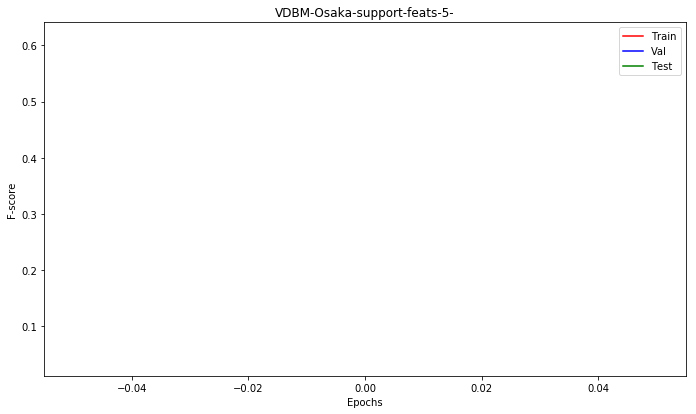

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch0========
TRAIN: (0.3175333333333333, 0.022, 0.04083821185233252)
VAL: (0.469437288388219, 0.8798646362098139, 0.6122295706264109)
TEST: (0.29535719087957896, 0.6169154228855721, 0.399464816907629)
======== Detailed Results ========
                    0           1           2     0     1           2     0  \
Precision    0.333333    0.300000    0.520521   0.0   0.0    0.478764   0.0   
Recall       0.030418    0.012658    0.975610   0.0   0.0    1.000000   0.0   
F-score      0.055749    0.024291    0.678851   0.0   0.0    0.647520   0.0   
Count      263.000000  237.000000  533.000000  58.0  77.0  124.000000  84.0   

              1           2  
Precision   0.0    0.478395  
Recall      0.0    1.000000  
F-score     0.0    0.647182  
Count      85.0  155.000000  
=#==#==#==#==#=1=#==#==#==#==#=


100%|██████████| 1033/1033 [14:03<00:00,  1.22it/s]


==========Epoch No:1==========
Training Loss: 1051.56585217
Train: (0.5008799485564748, 0.5179090029041626, 0.3694004127485006, None)
                    0           1           2
Precision    0.400000    0.571429    0.519288
Recall       0.022814    0.016878    0.984991
F-score      0.043165    0.032787    0.680052
Count      263.000000  237.000000  533.000000
--------
Val: (0.22921542612662305, 0.47876447876447875, 0.31000937528352673, None)
              0     1           2
Precision   0.0   0.0    0.478764
Recall      0.0   0.0    1.000000
F-score     0.0   0.0    0.647520
Count      58.0  77.0  124.000000
--------
Test: (0.22886183508611493, 0.4783950617283951, 0.30960849506430577, None)
              0     1           2
Precision   0.0   0.0    0.478395
Recall      0.0   0.0    1.000000
F-score     0.0   0.0    0.647182
Count      84.0  85.0  155.000000




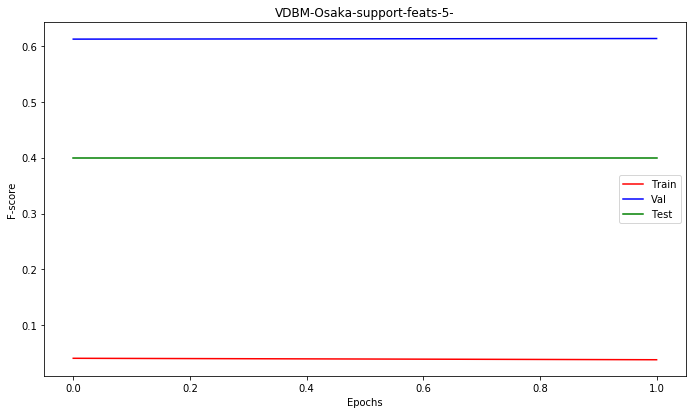

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch1========
TRAIN: (0.4812571428571429, 0.02, 0.03824601957778039)
VAL: (0.46832557602414066, 0.8883248730964467, 0.613312380000526)
TEST: (0.29535719087957896, 0.6169154228855721, 0.399464816907629)
======== Detailed Results ========
                    0           1           2     0     1           2     0  \
Precision    0.400000    0.571429    0.519288   0.0   0.0    0.478764   0.0   
Recall       0.022814    0.016878    0.984991   0.0   0.0    1.000000   0.0   
F-score      0.043165    0.032787    0.680052   0.0   0.0    0.647520   0.0   
Count      263.000000  237.000000  533.000000  58.0  77.0  124.000000  84.0   

              1           2  
Precision   0.0    0.478395  
Recall      0.0    1.000000  
F-score     0.0    0.647182  
Count      85.0  155.000000  
=#==#==#==#==#=2=#==#==#==#==#=


100%|██████████| 1033/1033 [15:03<00:00,  1.14it/s]


==========Epoch No:2==========
Training Loss: 1025.69820374
Train: (0.5111944752540076, 0.5208131655372701, 0.3817892624152843, None)
                    0           1           2
Precision    0.458333    0.545455    0.522044
Recall       0.041825    0.025316    0.977486
F-score      0.076655    0.048387    0.680601
Count      263.000000  237.000000  533.000000
--------
Val: (0.443689785795049, 0.5173745173745173, 0.3878362767850638, None)
                   0     1           2
Precision   0.916667   0.0    0.497976
Recall      0.189655   0.0    0.991935
F-score     0.314286   0.0    0.663073
Count      58.000000  77.0  124.000000
--------
Test: (0.5000100208433541, 0.5277777777777778, 0.403270671679599, None)
                   0     1           2
Precision   1.000000   0.0    0.503247
Recall      0.190476   0.0    1.000000
F-score     0.320000   0.0    0.669546
Count      84.000000  85.0  155.000000




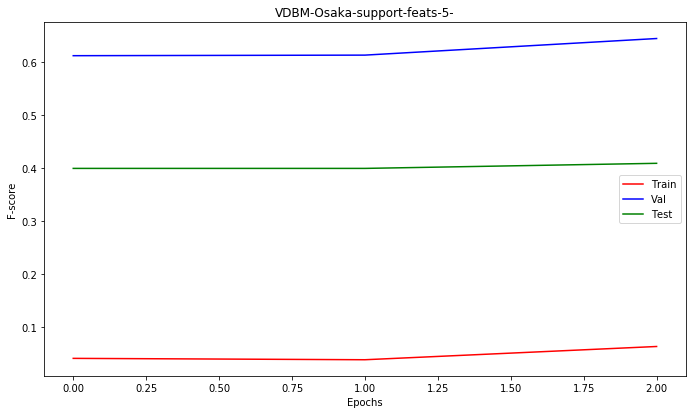

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch2========
TRAIN: (0.49962878787878784, 0.034, 0.06325604136225693)
VAL: (0.560771853916519, 0.9001692047377327, 0.6446511993611365)
TEST: (0.3072088947972687, 0.6119402985074627, 0.4090598221828861)
======== Detailed Results ========
                    0           1           2          0     1           2  \
Precision    0.458333    0.545455    0.522044   0.916667   0.0    0.497976   
Recall       0.041825    0.025316    0.977486   0.189655   0.0    0.991935   
F-score      0.076655    0.048387    0.680601   0.314286   0.0    0.663073   
Count      263.000000  237.000000  533.000000  58.000000  77.0  124.000000   

                   0     1           2  
Precision   1.000000   0.0    0.503247  
Recall      0.190476   0.0    1.000000  
F-score     0.320000   0.0    0.669546  
Count      84.000000  85.0  155.000000  
=#==#==#==#==#=3=#==#==#==#==#=


100%|██████████| 1033/1033 [25:44<00:00,  1.50s/it]


==========Epoch No:3==========
Training Loss: 969.438402653
Train: (0.5961621893392982, 0.5546950629235237, 0.46023942572154714, None)
                    0           1           2
Precision    0.681159    0.620690    0.543316
Recall       0.178707    0.075949    0.953096
F-score      0.283133    0.135338    0.692098
Count      263.000000  237.000000  533.000000
--------
Val: (0.7492839014868388, 0.6254826254826255, 0.5804523158731801, None)
                   0          1           2
Precision   0.809524   1.000000    0.565421
Recall      0.293103   0.311688    0.975806
F-score     0.430380   0.475248    0.715976
Count      58.000000  77.000000  124.000000
--------
Test: (0.7273495416796659, 0.595679012345679, 0.5364927868785894, None)
                   0          1           2
Precision   0.888889   0.900000    0.545126
Recall      0.285714   0.211765    0.974194
F-score     0.432432   0.342857    0.699074
Count      84.000000  85.000000  155.000000




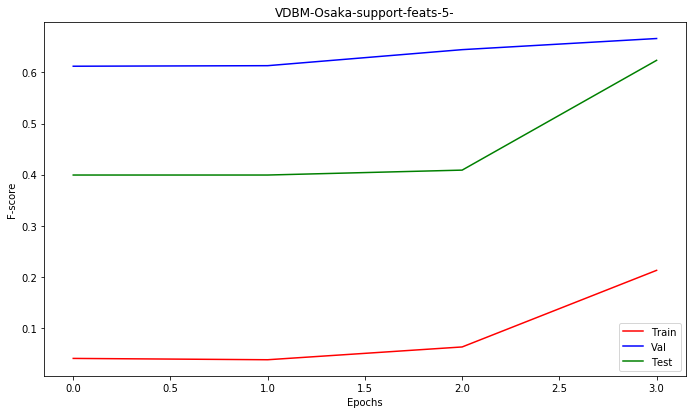

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch3========
TRAIN: (0.652496751624188, 0.13, 0.21307808678322318)
VAL: (0.5694408574074147, 0.8883248730964467, 0.6664133818869752)
TEST: (0.73190124145627, 0.7213930348258707, 0.6237568382820795)
======== Detailed Results ========
                    0           1           2          0          1  \
Precision    0.681159    0.620690    0.543316   0.809524   1.000000   
Recall       0.178707    0.075949    0.953096   0.293103   0.311688   
F-score      0.283133    0.135338    0.692098   0.430380   0.475248   
Count      263.000000  237.000000  533.000000  58.000000  77.000000   

                    2          0          1           2  
Precision    0.565421   0.888889   0.900000    0.545126  
Recall       0.975806   0.285714   0.211765    0.974194  
F-score      0.715976   0.432432   0.342857    0.699074  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=4=#==#==#==#==#=


100%|██████████| 1033/1033 [25:55<00:00,  1.51s/it]


==========Epoch No:4==========
Training Loss: 731.02270937
Train: (0.7110652014910738, 0.6940948693126815, 0.6715579733253095, None)
                    0           1           2
Precision    0.735955    0.773109    0.671196
Recall       0.498099    0.388186    0.926829
F-score      0.594104    0.516854    0.778566
Count      263.000000  237.000000  533.000000
--------
Val: (0.8419581628536853, 0.8416988416988417, 0.840513739522942, None)
                   0          1           2
Precision   0.800000   0.871429    0.843284
Recall      0.758621   0.792208    0.911290
F-score     0.778761   0.829932    0.875969
Count      58.000000  77.000000  124.000000
--------
Test: (0.8575620965773771, 0.8580246913580247, 0.8572496452999597, None)
                   0          1           2
Precision   0.814815   0.875000    0.871166
Recall      0.785714   0.823529    0.916129
F-score     0.800000   0.848485    0.893082
Count      84.000000  85.000000  155.000000




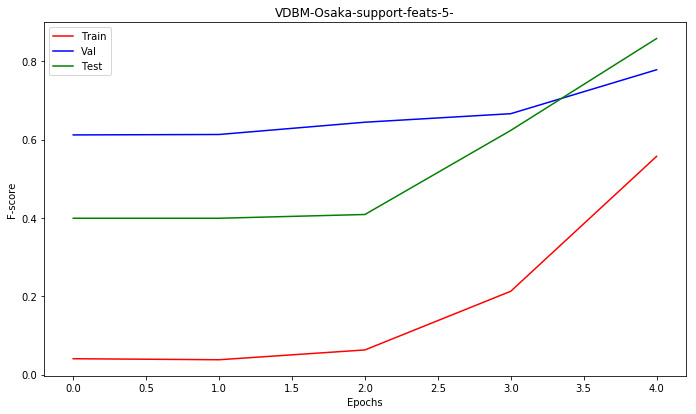

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch4========
TRAIN: (0.7535661410631669, 0.446, 0.5574876302580957)
VAL: (0.6838363495917017, 0.9103214890016921, 0.7785849626208413)
TEST: (0.8540654934283805, 0.8656716417910447, 0.8583329201170228)
======== Detailed Results ========
                    0           1           2          0          1  \
Precision    0.735955    0.773109    0.671196   0.800000   0.871429   
Recall       0.498099    0.388186    0.926829   0.758621   0.792208   
F-score      0.594104    0.516854    0.778566   0.778761   0.829932   
Count      263.000000  237.000000  533.000000  58.000000  77.000000   

                    2          0          1           2  
Precision    0.843284   0.814815   0.875000    0.871166  
Recall       0.911290   0.785714   0.823529    0.916129  
F-score      0.875969   0.800000   0.848485    0.893082  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=5=#==#==#==#==#=


  3%|▎         | 31/1033 [00:48<26:22,  1.58s/it]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 1033/1033 [26:56<00:00,  1.57s/it]


==========Epoch No:7==========
Training Loss: 446.703361392
Train: (0.8270872615867236, 0.8286544046466602, 0.826314502035588, None)
                    0           1           2
Precision    0.800000    0.815166    0.845754
Recall       0.745247    0.725738    0.915572
F-score      0.771654    0.767857    0.879279
Count      263.000000  237.000000  533.000000
--------
Val: (0.9082386922856821, 0.9073359073359073, 0.9069953016935804, None)
                   0          1           2
Precision   0.877193   0.943662    0.900763
Recall      0.862069   0.870130    0.951613
F-score     0.869565   0.905405    0.925490
Count      58.000000  77.000000  124.000000
--------
Test: (0.9032596645232145, 0.9012345679012346, 0.9003869794540703, None)
                   0          1           2
Precision   0.890244   0.945946    0.886905
Recall      0.869048   0.823529    0.961290
F-score     0.879518   0.880503    0.922601
Count      84.000000  85.000000  155.000000




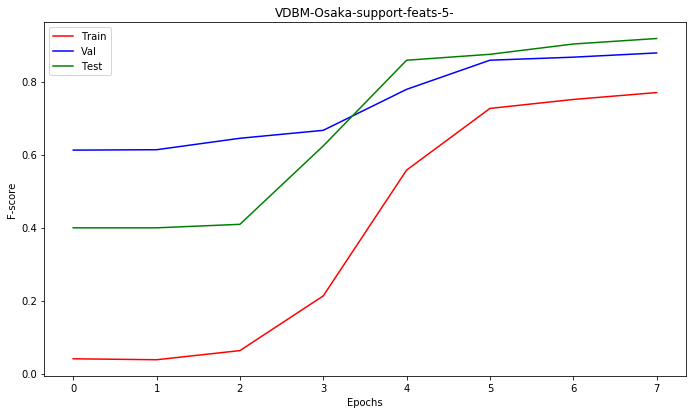

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch7========
TRAIN: (0.8071886255924171, 0.736, 0.7698540494938132)
VAL: (0.8488392917179917, 0.9103214890016921, 0.8783259534087166)
TEST: (0.9171971558185847, 0.9203980099502488, 0.9177960225370233)
======== Detailed Results ========
                    0           1           2          0          1  \
Precision    0.800000    0.815166    0.845754   0.877193   0.943662   
Recall       0.745247    0.725738    0.915572   0.862069   0.870130   
F-score      0.771654    0.767857    0.879279   0.869565   0.905405   
Count      263.000000  237.000000  533.000000  58.000000  77.000000   

                    2          0          1           2  
Precision    0.900763   0.890244   0.945946    0.886905  
Recall       0.951613   0.869048   0.823529    0.961290  
F-score      0.925490   0.879518   0.880503    0.922601  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=8=#==#==#==#==#=


100%|██████████| 1033/1033 [26:25<00:00,  1.53s/it]


==========Epoch No:8==========
Training Loss: 409.725616217
Train: (0.8316340626610882, 0.8334946757018393, 0.8316943070144258, None)
                    0           1           2
Precision    0.795181    0.807339    0.860424
Recall       0.752852    0.742616    0.913696
F-score      0.773437    0.773626    0.886260
Count      263.000000  237.000000  533.000000
--------
Val: (0.9138326738945933, 0.9111969111969112, 0.9109236932395391, None)
                  0          1           2
Precision   0.87931   0.970588    0.894737
Recall      0.87931   0.857143    0.959677
F-score     0.87931   0.910345    0.926070
Count      58.00000  77.000000  124.000000
--------
Test: (0.9024194667327937, 0.9012345679012346, 0.9005675234399815, None)
                   0          1           2
Precision   0.882353   0.933333    0.896341
Recall      0.892857   0.823529    0.948387
F-score     0.887574   0.875000    0.921630
Count      84.000000  85.000000  155.000000




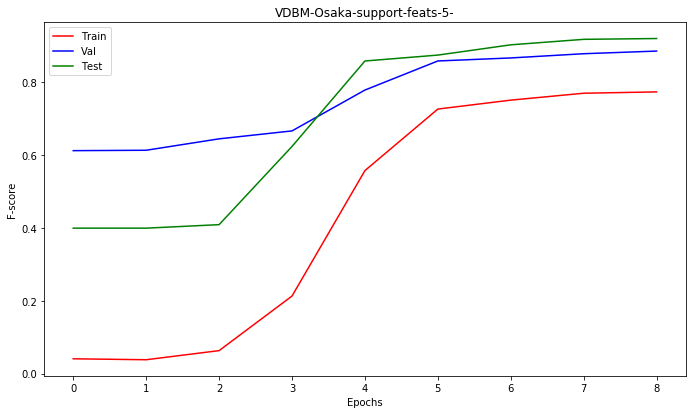

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch8========
TRAIN: (0.8009439593235327, 0.748, 0.773527026098901)
VAL: (0.8622775077278135, 0.9103214890016921, 0.885578182904317)
TEST: (0.9237943409885556, 0.9203980099502488, 0.9200459529803017)
======== Detailed Results ========
                    0           1           2         0          1  \
Precision    0.795181    0.807339    0.860424   0.87931   0.970588   
Recall       0.752852    0.742616    0.913696   0.87931   0.857143   
F-score      0.773437    0.773626    0.886260   0.87931   0.910345   
Count      263.000000  237.000000  533.000000  58.00000  77.000000   

                    2          0          1           2  
Precision    0.894737   0.882353   0.933333    0.896341  
Recall       0.959677   0.892857   0.823529    0.948387  
F-score      0.926070   0.887574   0.875000    0.921630  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=9=#==#==#==#==#=


100%|██████████| 1033/1033 [25:56<00:00,  1.51s/it]


==========Epoch No:9==========
Training Loss: 378.602863133
Train: (0.8535873243208291, 0.8547918683446273, 0.8537358788586975, None)
                    0           1           2
Precision    0.815686    0.833333    0.881295
Recall       0.790875    0.780591    0.919325
F-score      0.803089    0.806100    0.899908
Count      263.000000  237.000000  533.000000
--------
Val: (0.9116410717914476, 0.9073359073359073, 0.907283198254642, None)
                   0          1           2
Precision   0.866667   0.984848    0.887218
Recall      0.896552   0.844156    0.951613
F-score     0.881356   0.909091    0.918288
Count      58.000000  77.000000  124.000000
--------
Test: (0.9006453555748349, 0.8981481481481481, 0.8969233793686763, None)
                   0          1           2
Precision   0.883721   0.943662    0.886228
Recall      0.904762   0.788235    0.954839
F-score     0.894118   0.858974    0.919255
Count      84.000000  85.000000  155.000000




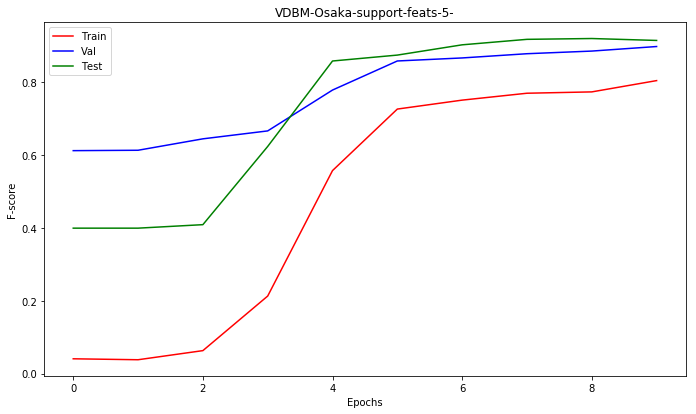

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.8240509803921569, 0.786, 0.8045162136926843)
VAL: (0.879859361241971, 0.9170896785109983, 0.898087478988983)
TEST: (0.9246187608324293, 0.9104477611940298, 0.9147646979112221)
======== Detailed Results ========
                    0           1           2          0          1  \
Precision    0.815686    0.833333    0.881295   0.866667   0.984848   
Recall       0.790875    0.780591    0.919325   0.896552   0.844156   
F-score      0.803089    0.806100    0.899908   0.881356   0.909091   
Count      263.000000  237.000000  533.000000  58.000000  77.000000   

                    2          0          1           2  
Precision    0.887218   0.883721   0.943662    0.886228  
Recall       0.951613   0.904762   0.788235    0.954839  
F-score      0.918288   0.894118   0.858974    0.919255  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=10=#==#==#==#==#=


 71%|███████   | 734/1033 [19:35<07:58,  1.60s/it]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 1033/1033 [24:50<00:00,  1.44s/it]


==========Epoch No:13==========
Training Loss: 276.698022068
Train: (0.9010747848664541, 0.9012584704743466, 0.9010935536383081, None)
                    0           1           2
Precision    0.874510    0.867220    0.929236
Recall       0.847909    0.881857    0.936210
F-score      0.861004    0.874477    0.932710
Count      263.000000  237.000000  533.000000
--------
Val: (0.8938469908361518, 0.888030888030888, 0.8868860446885456, None)
                   0          1           2
Precision   0.905660   0.953846    0.851064
Recall      0.827586   0.805195    0.967742
F-score     0.864865   0.873239    0.905660
Count      58.000000  77.000000  124.000000
--------
Test: (0.9056254119129947, 0.9012345679012346, 0.8996116418182731, None)
                   0          1           2
Precision   0.914634   0.956522    0.872832
Recall      0.892857   0.776471    0.974194
F-score     0.903614   0.857143    0.920732
Count      84.000000  85.000000  155.000000




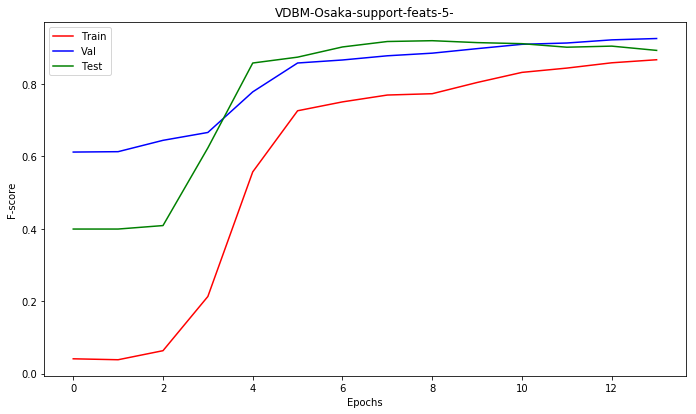

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch13========
TRAIN: (0.8710543975266455, 0.864, 0.8673901229382401)
VAL: (0.9269227680042585, 0.9255499153976311, 0.9260520162460483)
TEST: (0.8904381529341835, 0.9054726368159204, 0.8932404149859261)
======== Detailed Results ========
                    0           1           2          0          1  \
Precision    0.874510    0.867220    0.929236   0.905660   0.953846   
Recall       0.847909    0.881857    0.936210   0.827586   0.805195   
F-score      0.861004    0.874477    0.932710   0.864865   0.873239   
Count      263.000000  237.000000  533.000000  58.000000  77.000000   

                    2          0          1           2  
Precision    0.851064   0.914634   0.956522    0.872832  
Recall       0.967742   0.892857   0.776471    0.974194  
F-score      0.905660   0.903614   0.857143    0.920732  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=14=#==#==#==#==#=


100%|██████████| 1033/1033 [24:58<00:00,  1.45s/it]


==========Epoch No:14==========
Training Loss: 251.789691508
Train: (0.9212829476042477, 0.9215876089060987, 0.9213742081137858, None)
                    0           1           2
Precision    0.902724    0.897872    0.940850
Recall       0.882129    0.890295    0.954972
F-score      0.892308    0.894068    0.947858
Count      263.000000  237.000000  533.000000
--------
Val: (0.9042152989465727, 0.8996138996138996, 0.8988747417487419, None)
                   0          1           2
Precision   0.923077   0.955882    0.863309
Recall      0.827586   0.844156    0.967742
F-score     0.872727   0.896552    0.912548
Count      58.000000  77.000000  124.000000
--------
Test: (0.9156614427269698, 0.9135802469135802, 0.9125978774728677, None)
                   0          1           2
Precision   0.925926   0.945946    0.893491
Recall      0.892857   0.823529    0.974194
F-score     0.909091   0.880503    0.932099
Count      84.000000  85.000000  155.000000




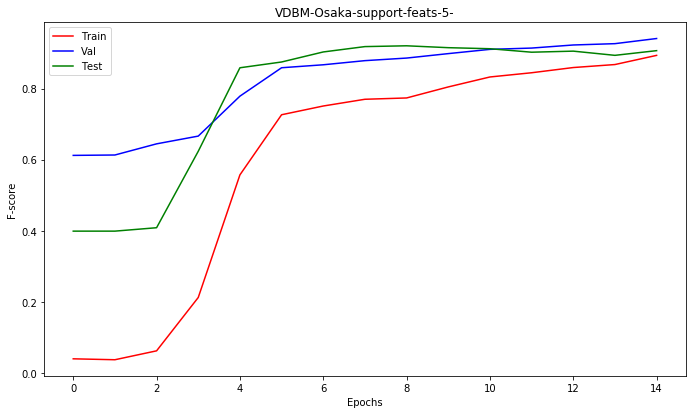

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch14========
TRAIN: (0.9004241741866049, 0.886, 0.8931419817470666)
VAL: (0.939106022538658, 0.9424703891708968, 0.9404851910764623)
TEST: (0.8987726412373175, 0.9203980099502488, 0.9064197825609072)
======== Detailed Results ========
                    0           1           2          0          1  \
Precision    0.902724    0.897872    0.940850   0.923077   0.955882   
Recall       0.882129    0.890295    0.954972   0.827586   0.844156   
F-score      0.892308    0.894068    0.947858   0.872727   0.896552   
Count      263.000000  237.000000  533.000000  58.000000  77.000000   

                    2          0          1           2  
Precision    0.863309   0.925926   0.945946    0.893491  
Recall       0.967742   0.892857   0.823529    0.974194  
F-score      0.912548   0.909091   0.880503    0.932099  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=15=#==#==#==#==#=


100%|██████████| 1033/1033 [20:38<00:00,  1.20s/it]


==========Epoch No:15==========
Training Loss: 226.854251385
Train: (0.9273401123287465, 0.9273959341723137, 0.9273392831213946, None)
                    0           1           2
Precision    0.914729    0.891213    0.949627
Recall       0.897338    0.898734    0.954972
F-score      0.905950    0.894958    0.952292
Count      263.000000  237.000000  533.000000
--------
Val: (0.9035056192746005, 0.8996138996138996, 0.8987730915211832, None)
                   0          1           2
Precision   0.907407   0.955224    0.869565
Recall      0.844828   0.831169    0.967742
F-score     0.875000   0.888889    0.916031
Count      58.000000  77.000000  124.000000
--------
Test: (0.9097830570521804, 0.9074074074074074, 0.9067819075590855, None)
                   0          1           2
Precision   0.883721   0.958904    0.896970
Recall      0.904762   0.823529    0.954839
F-score     0.894118   0.886076    0.925000
Count      84.000000  85.000000  155.000000




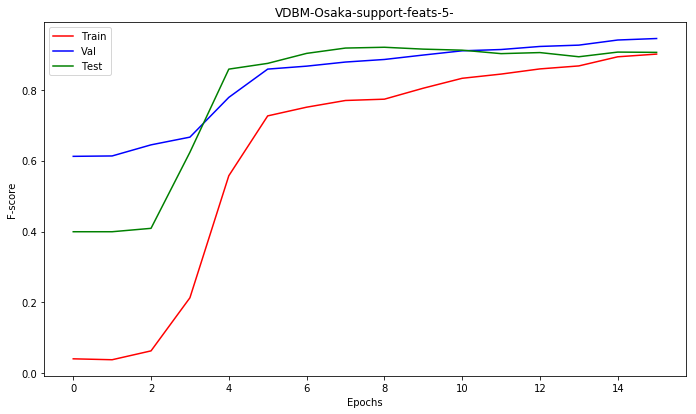

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch15========
TRAIN: (0.90358243326522, 0.898, 0.9007398345134598)
VAL: (0.9454835009012094, 0.9441624365482234, 0.9447065350383599)
TEST: (0.9023797301616512, 0.9154228855721394, 0.905632988577047)
======== Detailed Results ========
                    0           1           2          0          1  \
Precision    0.914729    0.891213    0.949627   0.907407   0.955224   
Recall       0.897338    0.898734    0.954972   0.844828   0.831169   
F-score      0.905950    0.894958    0.952292   0.875000   0.888889   
Count      263.000000  237.000000  533.000000  58.000000  77.000000   

                    2          0          1           2  
Precision    0.869565   0.883721   0.958904    0.896970  
Recall       0.967742   0.904762   0.823529    0.954839  
F-score      0.916031   0.894118   0.886076    0.925000  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=16=#==#==#==#==#=


100%|██████████| 1033/1033 [14:33<00:00,  1.18it/s]


==========Epoch No:16==========
Training Loss: 217.080780089
Train: (0.9253561871012506, 0.925459825750242, 0.9251065512736095, None)
                    0           1           2
Precision    0.931727    0.901709    0.932727
Recall       0.882129    0.890295    0.962477
F-score      0.906250    0.895966    0.947368
Count      263.000000  237.000000  533.000000
--------
Val: (0.8885694485694486, 0.8803088803088803, 0.8791182245039718, None)
                   0          1           2
Precision   0.920000   0.953846    0.833333
Recall      0.793103   0.805195    0.967742
F-score     0.851852   0.873239    0.895522
Count      58.000000  77.000000  124.000000
--------
Test: (0.8895618043732223, 0.8827160493827161, 0.880484239448329, None)
                   0          1           2
Precision   0.923077   0.940299    0.843575
Recall      0.857143   0.741176    0.974194
F-score     0.888889   0.828947    0.904192
Count      84.000000  85.000000  155.000000




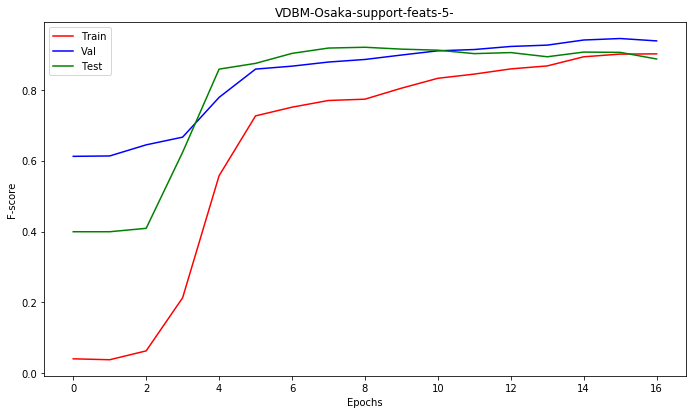

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch15========
TRAIN: (0.90358243326522, 0.898, 0.9007398345134598)
VAL: (0.9454835009012094, 0.9441624365482234, 0.9447065350383599)
TEST: (0.9023797301616512, 0.9154228855721394, 0.905632988577047)
======== Detailed Results ========
                    0           1           2          0          1  \
Precision    0.914729    0.891213    0.949627   0.907407   0.955224   
Recall       0.897338    0.898734    0.954972   0.844828   0.831169   
F-score      0.905950    0.894958    0.952292   0.875000   0.888889   
Count      263.000000  237.000000  533.000000  58.000000  77.000000   

                    2          0          1           2  
Precision    0.869565   0.883721   0.958904    0.896970  
Recall       0.967742   0.904762   0.823529    0.954839  
F-score      0.916031   0.894118   0.886076    0.925000  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=17=#==#==#==#==#=


100%|██████████| 1033/1033 [14:33<00:00,  1.18it/s]


==========Epoch No:17==========
Training Loss: 208.341500342
Train: (0.9368418546454266, 0.9370764762826719, 0.9368869678184857, None)
                    0           1           2
Precision    0.918919    0.926724    0.950185
Recall       0.904943    0.907173    0.966229
F-score      0.911877    0.916844    0.958140
Count      263.000000  237.000000  533.000000
--------
Val: (0.9049055700218491, 0.9034749034749034, 0.9033552551817633, None)
                   0          1           2
Precision   0.866667   0.942857    0.899225
Recall      0.896552   0.857143    0.935484
F-score     0.881356   0.897959    0.916996
Count      58.000000  77.000000  124.000000
--------
Test: (0.8898715310752349, 0.8858024691358025, 0.8852707649017979, None)
                   0          1           2
Precision   0.822917   0.930556    0.903846
Recall      0.940476   0.788235    0.909677
F-score     0.877778   0.853503    0.906752
Count      84.000000  85.000000  155.000000




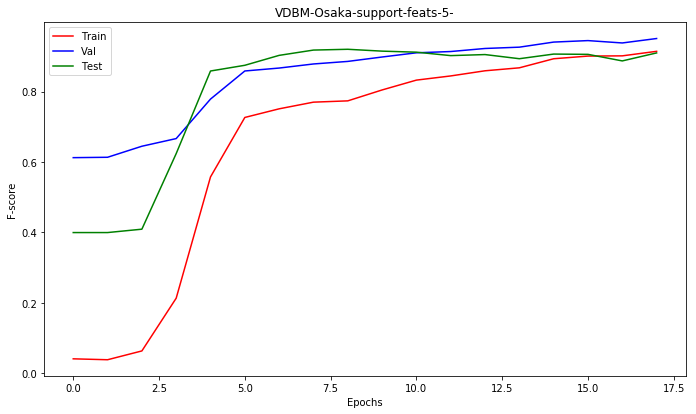

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch17========
TRAIN: (0.9226185927306617, 0.906, 0.914231731326945)
VAL: (0.9419881660745542, 0.9593908629441624, 0.9506040882585786)
TEST: (0.9159396814377724, 0.9054726368159204, 0.9097033185287566)
======== Detailed Results ========
                    0           1           2          0          1  \
Precision    0.918919    0.926724    0.950185   0.866667   0.942857   
Recall       0.904943    0.907173    0.966229   0.896552   0.857143   
F-score      0.911877    0.916844    0.958140   0.881356   0.897959   
Count      263.000000  237.000000  533.000000  58.000000  77.000000   

                    2          0          1           2  
Precision    0.899225   0.822917   0.930556    0.903846  
Recall       0.935484   0.940476   0.788235    0.909677  
F-score      0.916996   0.877778   0.853503    0.906752  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=18=#==#==#==#==#=


100%|██████████| 1033/1033 [14:33<00:00,  1.18it/s]


==========Epoch No:18==========
Training Loss: 191.239661753
Train: (0.9371977342897887, 0.9370764762826719, 0.9371172299738875, None)
                    0           1           2
Precision    0.923372    0.908714    0.956685
Recall       0.916350    0.924051    0.953096
F-score      0.919847    0.916318    0.954887
Count      263.000000  237.000000  533.000000
--------
Val: (0.9024246964545473, 0.8996138996138996, 0.8992542027499655, None)
                   0          1           2
Precision   0.866667   0.955224    0.886364
Recall      0.896552   0.831169    0.943548
F-score     0.881356   0.888889    0.914062
Count      58.000000  77.000000  124.000000
--------
Test: (0.9073880456106327, 0.904320987654321, 0.9034407275388986, None)
                   0          1           2
Precision   0.866667   0.957746    0.901840
Recall      0.928571   0.800000    0.948387
F-score     0.896552   0.871795    0.924528
Count      84.000000  85.000000  155.000000




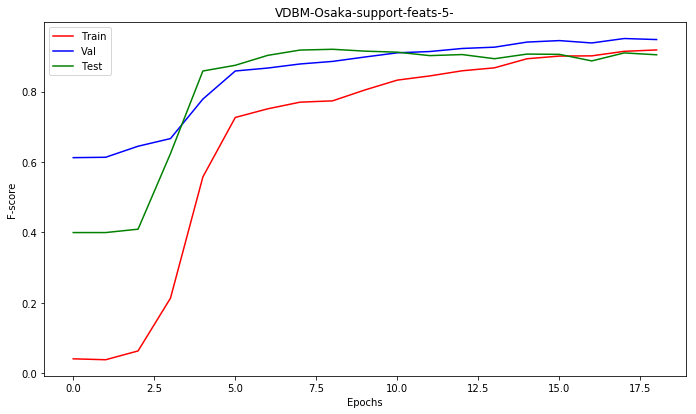

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch17========
TRAIN: (0.9226185927306617, 0.906, 0.914231731326945)
VAL: (0.9419881660745542, 0.9593908629441624, 0.9506040882585786)
TEST: (0.9159396814377724, 0.9054726368159204, 0.9097033185287566)
======== Detailed Results ========
                    0           1           2          0          1  \
Precision    0.918919    0.926724    0.950185   0.866667   0.942857   
Recall       0.904943    0.907173    0.966229   0.896552   0.857143   
F-score      0.911877    0.916844    0.958140   0.881356   0.897959   
Count      263.000000  237.000000  533.000000  58.000000  77.000000   

                    2          0          1           2  
Precision    0.899225   0.822917   0.930556    0.903846  
Recall       0.935484   0.940476   0.788235    0.909677  
F-score      0.916996   0.877778   0.853503    0.906752  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=19=#==#==#==#==#=


100%|██████████| 1033/1033 [14:39<00:00,  1.17it/s]


==========Epoch No:19==========
Training Loss: 197.155581057
Train: (0.9399067487674193, 0.9399806389157793, 0.9399229307247624, None)
                    0           1           2
Precision    0.934363    0.915612    0.953445
Recall       0.920152    0.915612    0.960600
F-score      0.927203    0.915612    0.957009
Count      263.000000  237.000000  533.000000
--------
Val: (0.9015932928976407, 0.8996138996138996, 0.8988744198351916, None)
                   0          1           2
Precision   0.890909   0.942029    0.881481
Recall      0.844828   0.844156    0.959677
F-score     0.867257   0.890411    0.918919
Count      58.000000  77.000000  124.000000
--------
Test: (0.9104225529623953, 0.9104938271604939, 0.9099231769648419, None)
                   0          1           2
Precision   0.903614   0.911392    0.913580
Recall      0.892857   0.847059    0.954839
F-score     0.898204   0.878049    0.933754
Count      84.000000  85.000000  155.000000




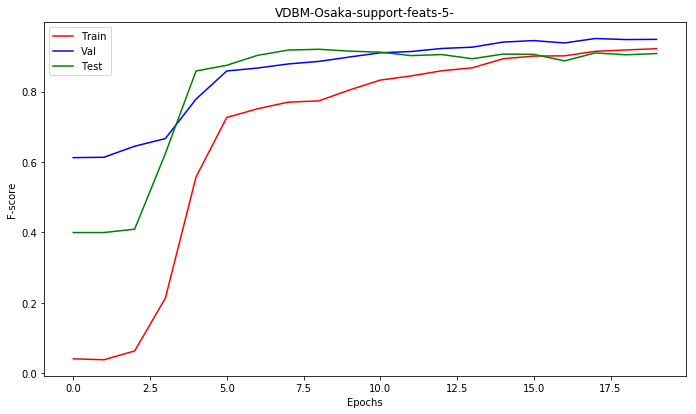

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch17========
TRAIN: (0.9226185927306617, 0.906, 0.914231731326945)
VAL: (0.9419881660745542, 0.9593908629441624, 0.9506040882585786)
TEST: (0.9159396814377724, 0.9054726368159204, 0.9097033185287566)
======== Detailed Results ========
                    0           1           2          0          1  \
Precision    0.918919    0.926724    0.950185   0.866667   0.942857   
Recall       0.904943    0.907173    0.966229   0.896552   0.857143   
F-score      0.911877    0.916844    0.958140   0.881356   0.897959   
Count      263.000000  237.000000  533.000000  58.000000  77.000000   

                    2          0          1           2  
Precision    0.899225   0.822917   0.930556    0.903846  
Recall       0.935484   0.940476   0.788235    0.909677  
F-score      0.916996   0.877778   0.853503    0.906752  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=20=#==#==#==#==#=


100%|██████████| 1033/1033 [14:12<00:00,  1.21it/s]


==========Epoch No:20==========
Training Loss: 171.907389045
Train: (0.9438255537971384, 0.9438528557599225, 0.943743900773802, None)
                    0           1           2
Precision    0.940945    0.925000    0.953618
Recall       0.908745    0.936709    0.964353
F-score      0.924565    0.930818    0.958955
Count      263.000000  237.000000  533.000000
--------
Val: (0.906552606980262, 0.8996138996138996, 0.8982471154977864, None)
                   0          1           2
Precision   0.883333   0.983607    0.869565
Recall      0.913793   0.779221    0.967742
F-score     0.898305   0.869565    0.916031
Count      58.000000  77.000000  124.000000
--------
Test: (0.909163198251688, 0.904320987654321, 0.9021695000637318, None)
                   0          1           2
Precision   0.868132   0.969697    0.898204
Recall      0.940476   0.752941    0.967742
F-score     0.902857   0.847682    0.931677
Count      84.000000  85.000000  155.000000




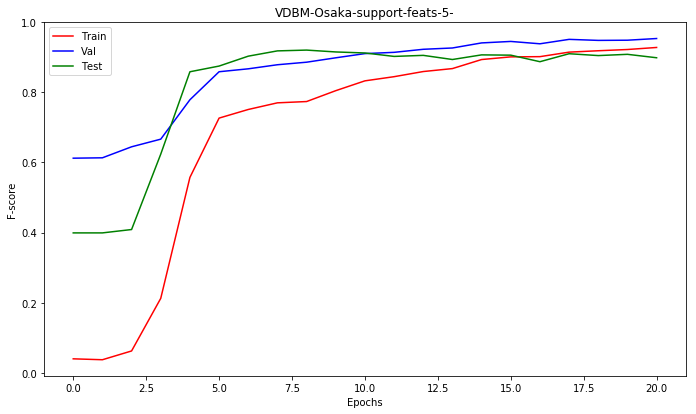

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch20========
TRAIN: (0.9333870078740159, 0.922, 0.9275286303419584)
VAL: (0.946720180150202, 0.9593908629441624, 0.9530030951668568)
TEST: (0.913252695893306, 0.8955223880597015, 0.8982303880530966)
======== Detailed Results ========
                    0           1           2          0          1  \
Precision    0.940945    0.925000    0.953618   0.883333   0.983607   
Recall       0.908745    0.936709    0.964353   0.913793   0.779221   
F-score      0.924565    0.930818    0.958955   0.898305   0.869565   
Count      263.000000  237.000000  533.000000  58.000000  77.000000   

                    2          0          1           2  
Precision    0.869565   0.868132   0.969697    0.898204  
Recall       0.967742   0.940476   0.752941    0.967742  
F-score      0.916031   0.902857   0.847682    0.931677  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=21=#==#==#==#==#=


100%|██████████| 1033/1033 [14:14<00:00,  1.21it/s]


==========Epoch No:22==========
Training Loss: 153.195515335
Train: (0.9460569271957644, 0.9457889641819942, 0.9457703560156632, None)
                    0           1           2
Precision    0.956349    0.909465    0.957249
Recall       0.916350    0.932489    0.966229
F-score      0.935922    0.920833    0.961718
Count      263.000000  237.000000  533.000000
--------
Val: (0.8642347243698595, 0.8494208494208494, 0.8471252875072157, None)
                   0          1           2
Precision   0.836364   0.982143    0.804054
Recall      0.793103   0.714286    0.959677
F-score     0.814159   0.827068    0.875000
Count      58.000000  77.000000  124.000000
--------
Test: (0.8679962013295347, 0.8549382716049383, 0.8512075487384131, None)
                   0          1           2
Precision   0.871795   0.966667    0.811828
Recall      0.809524   0.682353    0.974194
F-score     0.839506   0.800000    0.885630
Count      84.000000  85.000000  155.000000




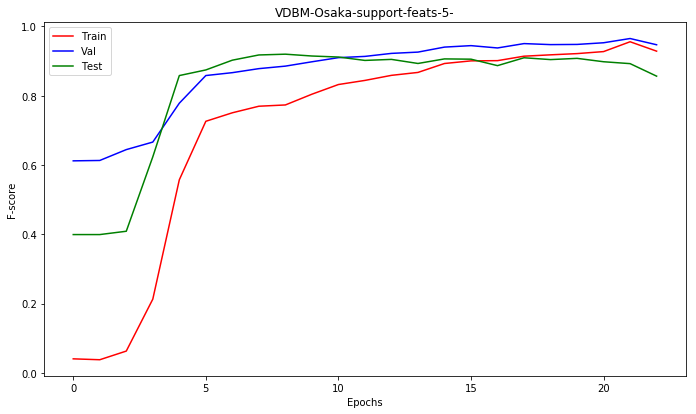

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch21========
TRAIN: (0.9578752201095297, 0.954, 0.9559001255674684)
VAL: (0.9643477655347787, 0.9661590524534687, 0.9652438700135095)
TEST: (0.8964003511852503, 0.8955223880597015, 0.8927669345579794)
======== Detailed Results ========
                    0           1           2          0          1  \
Precision    0.961390    0.953975    0.973832   0.877193   0.954545   
Recall       0.946768    0.962025    0.977486   0.862069   0.818182   
F-score      0.954023    0.957983    0.975655   0.869565   0.881119   
Count      263.000000  237.000000  533.000000  58.000000  77.000000   

                    2          0          1           2  
Precision    0.860294   0.853933   0.957143    0.884848  
Recall       0.943548   0.904762   0.788235    0.941935  
F-score      0.900000   0.878613   0.864516    0.912500  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=23=#==#==#==#==#=


100%|██████████| 1033/1033 [14:16<00:00,  1.21it/s]


==========Epoch No:23==========
Training Loss: 121.803755105
Train: (0.9653662550787994, 0.9651500484027106, 0.9650630847461182, None)
                    0           1           2
Precision    0.980080    0.957806    0.961468
Recall       0.935361    0.957806    0.983114
F-score      0.957198    0.957806    0.972171
Count      263.000000  237.000000  533.000000
--------
Val: (0.8623105052152352, 0.8378378378378378, 0.83497973958064, None)
                   0          1           2
Precision   0.909091   0.982456    0.765823
Recall      0.689655   0.727273    0.975806
F-score     0.784314   0.835821    0.858156
Count      58.000000  77.000000  124.000000
--------
Test: (0.8731288580246914, 0.845679012345679, 0.8422339349989516, None)
                   0          1           2
Precision   0.966667   0.968750    0.770000
Recall      0.690476   0.729412    0.993548
F-score     0.805556   0.832215    0.867606
Count      84.000000  85.000000  155.000000




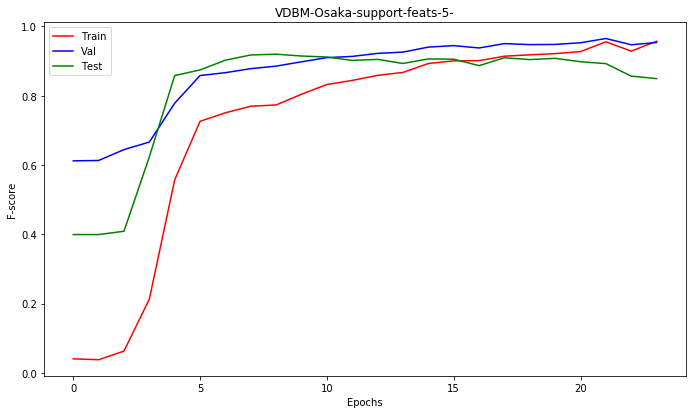

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch21========
TRAIN: (0.9578752201095297, 0.954, 0.9559001255674684)
VAL: (0.9643477655347787, 0.9661590524534687, 0.9652438700135095)
TEST: (0.8964003511852503, 0.8955223880597015, 0.8927669345579794)
======== Detailed Results ========
                    0           1           2          0          1  \
Precision    0.961390    0.953975    0.973832   0.877193   0.954545   
Recall       0.946768    0.962025    0.977486   0.862069   0.818182   
F-score      0.954023    0.957983    0.975655   0.869565   0.881119   
Count      263.000000  237.000000  533.000000  58.000000  77.000000   

                    2          0          1           2  
Precision    0.860294   0.853933   0.957143    0.884848  
Recall       0.943548   0.904762   0.788235    0.941935  
F-score      0.900000   0.878613   0.864516    0.912500  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=24=#==#==#==#==#=


 97%|█████████▋| 1006/1033 [13:52<00:22,  1.21it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 1033/1033 [14:01<00:00,  1.23it/s]


==========Epoch No:28==========
Training Loss: 58.3876920342
Train: (0.9874284057880411, 0.9874152952565344, 0.9873757222905059, None)
                    0           1           2
Precision    0.988327    0.983333    0.988806
Recall       0.965779    0.995781    0.994371
F-score      0.976923    0.989518    0.991581
Count      263.000000  237.000000  533.000000
--------
Val: (0.8956241956241956, 0.8918918918918919, 0.8914171501044088, None)
                  0          1           2
Precision   0.87931   0.954545    0.866667
Recall      0.87931   0.818182    0.943548
F-score     0.87931   0.881119    0.903475
Count      58.00000  77.000000  124.000000
--------
Test: (0.8882692145111482, 0.8858024691358025, 0.8846698907323706, None)
                   0          1           2
Precision   0.879518   0.930556    0.869822
Recall      0.869048   0.788235    0.948387
F-score     0.874251   0.853503    0.907407
Count      84.000000  85.000000  155.000000




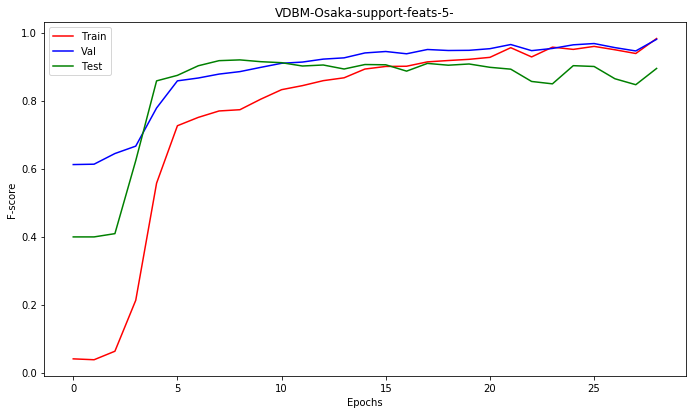

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch28========
TRAIN: (0.9859599221789883, 0.98, 0.982892985002419)
VAL: (0.9780602065813068, 0.9830795262267343, 0.9805628233923571)
TEST: (0.9003316749585406, 0.8955223880597015, 0.8949106561046859)
======== Detailed Results ========
                    0           1           2         0          1  \
Precision    0.988327    0.983333    0.988806   0.87931   0.954545   
Recall       0.965779    0.995781    0.994371   0.87931   0.818182   
F-score      0.976923    0.989518    0.991581   0.87931   0.881119   
Count      263.000000  237.000000  533.000000  58.00000  77.000000   

                    2          0          1           2  
Precision    0.866667   0.879518   0.930556    0.869822  
Recall       0.943548   0.869048   0.788235    0.948387  
F-score      0.903475   0.874251   0.853503    0.907407  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=29=#==#==#==#==#=


100%|██████████| 1033/1033 [14:20<00:00,  1.20it/s]


==========Epoch No:29==========
Training Loss: 54.134498775
Train: (0.9855669369810065, 0.9854791868344628, 0.9854987136819026, None)
                    0           1           2
Precision    0.988462    0.966805    0.992481
Recall       0.977186    0.983122    0.990619
F-score      0.982792    0.974895    0.991549
Count      263.000000  237.000000  533.000000
--------
Val: (0.8923794074773713, 0.888030888030888, 0.8872464269976781, None)
                   0          1           2
Precision   0.877193   0.953846    0.861314
Recall      0.862069   0.805195    0.951613
F-score     0.869565   0.873239    0.904215
Count      58.000000  77.000000  124.000000
--------
Test: (0.8938644207416324, 0.8919753086419753, 0.8908272672280566, None)
                   0          1           2
Precision   0.872093   0.930556    0.885542
Recall      0.892857   0.788235    0.948387
F-score     0.882353   0.853503    0.915888
Count      84.000000  85.000000  155.000000




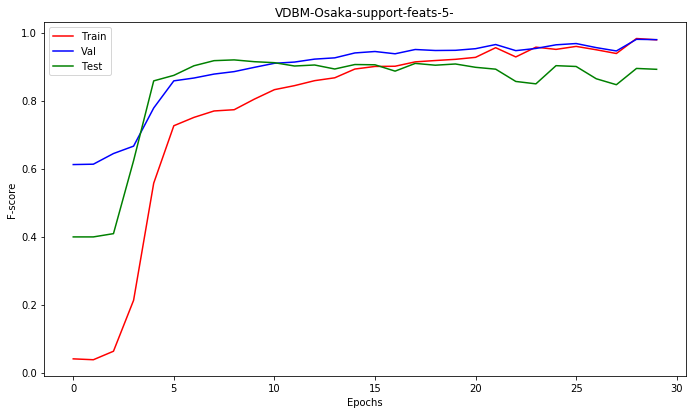

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch28========
TRAIN: (0.9859599221789883, 0.98, 0.982892985002419)
VAL: (0.9780602065813068, 0.9830795262267343, 0.9805628233923571)
TEST: (0.9003316749585406, 0.8955223880597015, 0.8949106561046859)
======== Detailed Results ========
                    0           1           2         0          1  \
Precision    0.988327    0.983333    0.988806   0.87931   0.954545   
Recall       0.965779    0.995781    0.994371   0.87931   0.818182   
F-score      0.976923    0.989518    0.991581   0.87931   0.881119   
Count      263.000000  237.000000  533.000000  58.00000  77.000000   

                    2          0          1           2  
Precision    0.866667   0.879518   0.930556    0.869822  
Recall       0.943548   0.869048   0.788235    0.948387  
F-score      0.903475   0.874251   0.853503    0.907407  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=30=#==#==#==#==#=


100%|██████████| 1033/1033 [14:18<00:00,  1.20it/s]


==========Epoch No:30==========
Training Loss: 53.4921032786
Train: (0.9912921297272244, 0.9912875121006777, 0.9912846979681946, None)
                    0           1           2
Precision    0.992337    0.987395    0.992509
Recall       0.984791    0.991561    0.994371
F-score      0.988550    0.989474    0.993440
Count      263.000000  237.000000  533.000000
--------
Val: (0.9277604005185421, 0.9266409266409267, 0.9268977088905059, None)
                   0          1           2
Precision   0.870968   0.947368    0.942149
Recall      0.931034   0.935065    0.919355
F-score     0.900000   0.941176    0.930612
Count      58.000000  77.000000  124.000000
--------
Test: (0.9092990871404886, 0.9074074074074074, 0.9078060971113312, None)
                   0          1           2
Precision   0.846154   0.938272    0.927632
Recall      0.916667   0.894118    0.909677
F-score     0.880000   0.915663    0.918567
Count      84.000000  85.000000  155.000000




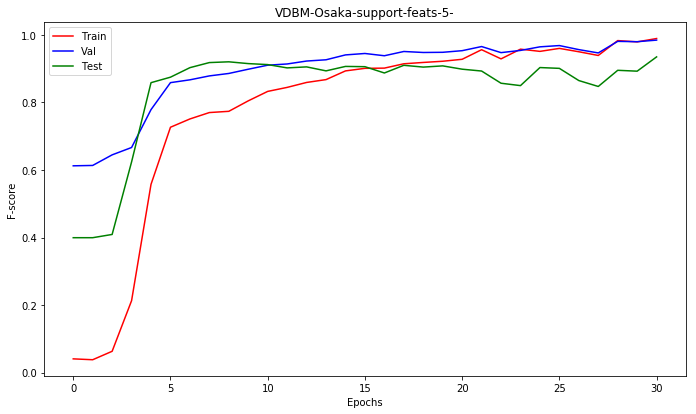

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch30========
TRAIN: (0.9899945587430374, 0.988, 0.9889876255524307)
VAL: (0.9805814207596653, 0.988155668358714, 0.9842695096868522)
TEST: (0.944148331850967, 0.9253731343283582, 0.9346592368290599)
======== Detailed Results ========
                    0           1           2          0          1  \
Precision    0.992337    0.987395    0.992509   0.870968   0.947368   
Recall       0.984791    0.991561    0.994371   0.931034   0.935065   
F-score      0.988550    0.989474    0.993440   0.900000   0.941176   
Count      263.000000  237.000000  533.000000  58.000000  77.000000   

                    2          0          1           2  
Precision    0.942149   0.846154   0.938272    0.927632  
Recall       0.919355   0.916667   0.894118    0.909677  
F-score      0.930612   0.880000   0.915663    0.918567  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=31=#==#==#==#==#=


  7%|▋         | 75/1033 [00:59<12:43,  1.25it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 1033/1033 [14:02<00:00,  1.23it/s]


==========Epoch No:34==========
Training Loss: 76.56397295
Train: (0.9845448182653342, 0.9845111326234269, 0.9844939311676644, None)
                    0           1           2
Precision    0.988372    0.987342    0.981413
Recall       0.969582    0.987342    0.990619
F-score      0.978887    0.987342    0.985994
Count      263.000000  237.000000  533.000000
--------
Val: (0.8972037649176963, 0.8957528957528957, 0.895939112062611, None)
                   0          1           2
Precision   0.898305   0.853659    0.923729
Recall      0.913793   0.909091    0.879032
F-score     0.905983   0.880503    0.900826
Count      58.000000  77.000000  124.000000
--------
Test: (0.893015026811323, 0.8919753086419753, 0.8921670792194643, None)
                   0          1           2
Precision   0.912500   0.844444    0.909091
Recall      0.869048   0.894118    0.903226
F-score     0.890244   0.868571    0.906149
Count      84.000000  85.000000  155.000000




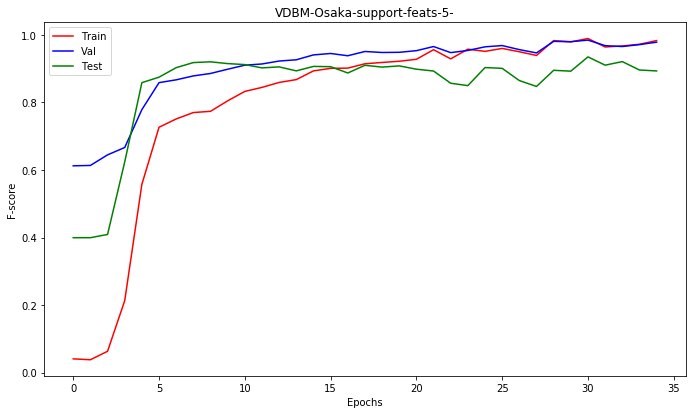

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch30========
TRAIN: (0.9899945587430374, 0.988, 0.9889876255524307)
VAL: (0.9805814207596653, 0.988155668358714, 0.9842695096868522)
TEST: (0.944148331850967, 0.9253731343283582, 0.9346592368290599)
======== Detailed Results ========
                    0           1           2          0          1  \
Precision    0.992337    0.987395    0.992509   0.870968   0.947368   
Recall       0.984791    0.991561    0.994371   0.931034   0.935065   
F-score      0.988550    0.989474    0.993440   0.900000   0.941176   
Count      263.000000  237.000000  533.000000  58.000000  77.000000   

                    2          0          1           2  
Precision    0.942149   0.846154   0.938272    0.927632  
Recall       0.919355   0.916667   0.894118    0.909677  
F-score      0.930612   0.880000   0.915663    0.918567  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=35=#==#==#==#==#=


100%|██████████| 1033/1033 [14:16<00:00,  1.21it/s]


==========Epoch No:35==========
Training Loss: 80.6130911708
Train: (0.9757975632154791, 0.9757986447241046, 0.9757927218719114, None)
                    0           1           2
Precision    0.977011    0.970464    0.977570
Recall       0.969582    0.970464    0.981238
F-score      0.973282    0.970464    0.979401
Count      263.000000  237.000000  533.000000
--------
Val: (0.8953517314868454, 0.8918918918918919, 0.8915448458842784, None)
                   0          1           2
Precision   0.877193   0.955224    0.866667
Recall      0.862069   0.831169    0.943548
F-score     0.869565   0.888889    0.903475
Count      58.000000  77.000000  124.000000
--------
Test: (0.8882973251028806, 0.8858024691358025, 0.885022439258989, None)
                   0          1           2
Precision   0.844444   0.930556    0.888889
Recall      0.904762   0.788235    0.929032
F-score     0.873563   0.853503    0.908517
Count      84.000000  85.000000  155.000000




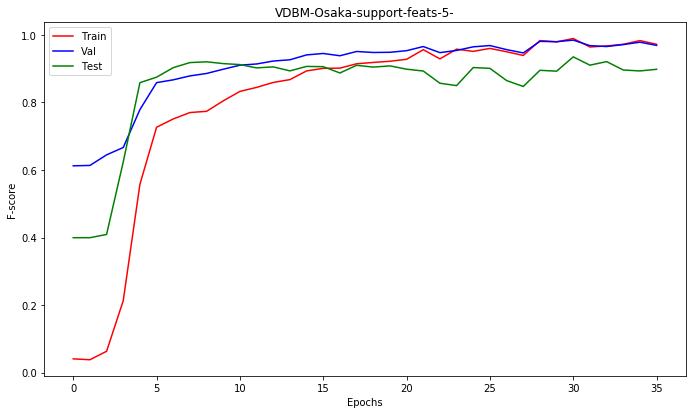

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch30========
TRAIN: (0.9899945587430374, 0.988, 0.9889876255524307)
VAL: (0.9805814207596653, 0.988155668358714, 0.9842695096868522)
TEST: (0.944148331850967, 0.9253731343283582, 0.9346592368290599)
======== Detailed Results ========
                    0           1           2          0          1  \
Precision    0.992337    0.987395    0.992509   0.870968   0.947368   
Recall       0.984791    0.991561    0.994371   0.931034   0.935065   
F-score      0.988550    0.989474    0.993440   0.900000   0.941176   
Count      263.000000  237.000000  533.000000  58.000000  77.000000   

                    2          0          1           2  
Precision    0.942149   0.846154   0.938272    0.927632  
Recall       0.919355   0.916667   0.894118    0.909677  
F-score      0.930612   0.880000   0.915663    0.918567  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=36=#==#==#==#==#=


100%|██████████| 1033/1033 [14:20<00:00,  1.20it/s]


==========Epoch No:36==========
Training Loss: 58.0277295113
Train: (0.987425444624976, 0.9874152952565344, 0.9874127181669354, None)
                    0           1           2
Precision    0.988506    0.983264    0.988743
Recall       0.980989    0.991561    0.988743
F-score      0.984733    0.987395    0.988743
Count      263.000000  237.000000  533.000000
--------
Val: (0.8779115249703484, 0.8571428571428571, 0.8550305987294694, None)
                   0          1           2
Precision   0.901961   1.000000    0.790850
Recall      0.793103   0.714286    0.975806
F-score     0.844037   0.833333    0.873646
Count      58.000000  77.000000  124.000000
--------
Test: (0.8584200978959124, 0.8487654320987654, 0.8443972358649634, None)
                   0          1           2
Precision   0.864198   0.933333    0.814208
Recall      0.833333   0.658824    0.961290
F-score     0.848485   0.772414    0.881657
Count      84.000000  85.000000  155.000000




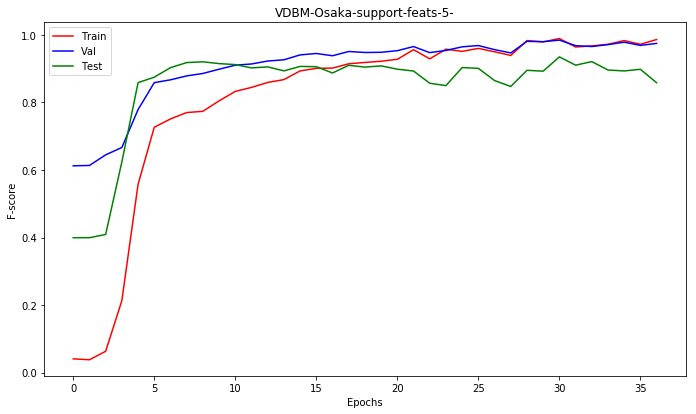

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch30========
TRAIN: (0.9899945587430374, 0.988, 0.9889876255524307)
VAL: (0.9805814207596653, 0.988155668358714, 0.9842695096868522)
TEST: (0.944148331850967, 0.9253731343283582, 0.9346592368290599)
======== Detailed Results ========
                    0           1           2          0          1  \
Precision    0.992337    0.987395    0.992509   0.870968   0.947368   
Recall       0.984791    0.991561    0.994371   0.931034   0.935065   
F-score      0.988550    0.989474    0.993440   0.900000   0.941176   
Count      263.000000  237.000000  533.000000  58.000000  77.000000   

                    2          0          1           2  
Precision    0.942149   0.846154   0.938272    0.927632  
Recall       0.919355   0.916667   0.894118    0.909677  
F-score      0.930612   0.880000   0.915663    0.918567  
Count      124.000000  84.000000  85.000000  155.000000  
=#==#==#==#==#=37=#==#==#==#==#=


 16%|█▌        | 166/1033 [02:18<12:02,  1.20it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 1033/1033 [14:08<00:00,  1.22it/s]


==========Epoch No:40==========
Training Loss: 4.70586419106
Train: (1.0, 1.0, 1.0, None)
               0      1      2
Precision    1.0    1.0    1.0
Recall       1.0    1.0    1.0
F-score      1.0    1.0    1.0
Count      263.0  237.0  533.0
--------
Val: (0.9135489652977864, 0.9111969111969112, 0.9116660157044003, None)
                   0          1           2
Precision   0.843750   0.958904    0.918033
Recall      0.931034   0.909091    0.903226
F-score     0.885246   0.933333    0.910569
Count      58.000000  77.000000  124.000000
--------
Test: (0.8907713445323836, 0.8858024691358025, 0.8863291843310339, None)
                   0          1           2
Precision   0.804124   0.934211    0.913907
Recall      0.928571   0.835294    0.890323
F-score     0.861878   0.881988    0.901961
Count      84.000000  85.000000  155.000000




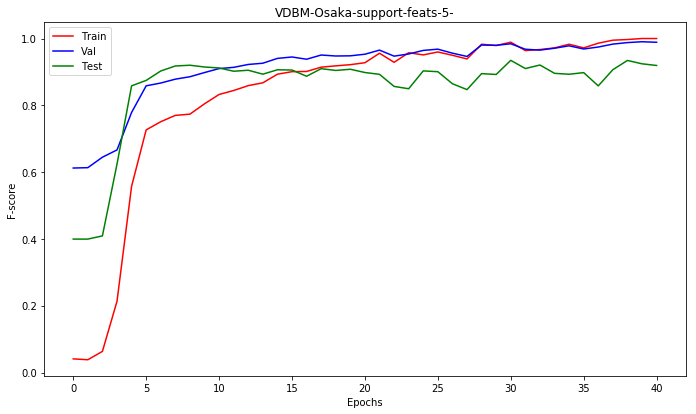

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch39========
TRAIN: (1.0, 1.0, 1.0)
VAL: (0.9861992385786802, 0.9949238578680203, 0.99034700840476)
TEST: (0.9387466440534805, 0.9104477611940298, 0.9243053027545202)
======== Detailed Results ========
               0      1      2          0          1           2          0  \
Precision    1.0    1.0    1.0   0.859375   0.958904    0.926230   0.804124   
Recall       1.0    1.0    1.0   0.948276   0.909091    0.911290   0.928571   
F-score      1.0    1.0    1.0   0.901639   0.933333    0.918699   0.861878   
Count      263.0  237.0  533.0  58.000000  77.000000  124.000000  84.000000   

                   1           2  
Precision   0.934211    0.913907  
Recall      0.835294    0.890323  
F-score     0.881988    0.901961  
Count      85.000000  155.000000  
=#==#==#==#==#=41=#==#==#==#==#=


100%|██████████| 1033/1033 [13:50<00:00,  1.24it/s]


==========Epoch No:41==========
Training Loss: 3.42035412788
Train: (1.0, 1.0, 1.0, None)
               0      1      2
Precision    1.0    1.0    1.0
Recall       1.0    1.0    1.0
F-score      1.0    1.0    1.0
Count      263.0  237.0  533.0
--------
Val: (0.9135489652977864, 0.9111969111969112, 0.9116660157044003, None)
                   0          1           2
Precision   0.843750   0.958904    0.918033
Recall      0.931034   0.909091    0.903226
F-score     0.885246   0.933333    0.910569
Count      58.000000  77.000000  124.000000
--------
Test: (0.893910219855237, 0.8888888888888888, 0.8895544465826277, None)
                   0          1           2
Precision   0.804124   0.935065    0.920000
Recall      0.928571   0.847059    0.890323
F-score     0.861878   0.888889    0.904918
Count      84.000000  85.000000  155.000000




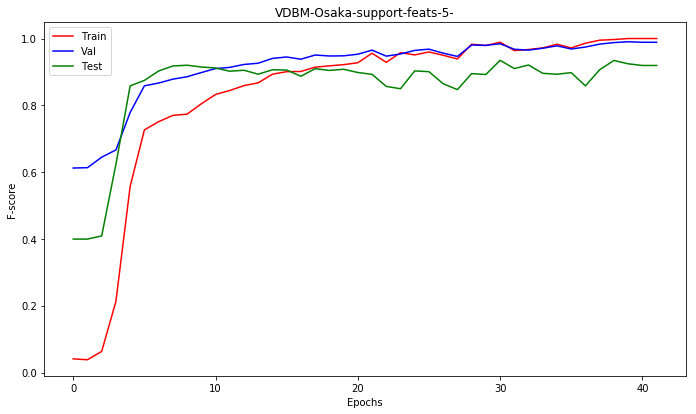

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch39========
TRAIN: (1.0, 1.0, 1.0)
VAL: (0.9861992385786802, 0.9949238578680203, 0.99034700840476)
TEST: (0.9387466440534805, 0.9104477611940298, 0.9243053027545202)
======== Detailed Results ========
               0      1      2          0          1           2          0  \
Precision    1.0    1.0    1.0   0.859375   0.958904    0.926230   0.804124   
Recall       1.0    1.0    1.0   0.948276   0.909091    0.911290   0.928571   
F-score      1.0    1.0    1.0   0.901639   0.933333    0.918699   0.861878   
Count      263.0  237.0  533.0  58.000000  77.000000  124.000000  84.000000   

                   1           2  
Precision   0.934211    0.913907  
Recall      0.835294    0.890323  
F-score     0.881988    0.901961  
Count      85.000000  155.000000  
=#==#==#==#==#=42=#==#==#==#==#=


100%|██████████| 1033/1033 [13:48<00:00,  1.25it/s]


==========Epoch No:42==========
Training Loss: 2.76236629486
Train: (1.0, 1.0, 1.0, None)
               0      1      2
Precision    1.0    1.0    1.0
Recall       1.0    1.0    1.0
F-score      1.0    1.0    1.0
Count      263.0  237.0  533.0
--------
Val: (0.9215777404966593, 0.918918918918919, 0.9193690359052029, None)
                   0          1           2
Precision   0.846154   0.959459    0.933333
Recall      0.948276   0.922078    0.903226
F-score     0.894309   0.940397    0.918033
Count      58.000000  77.000000  124.000000
--------
Test: (0.8915260520405934, 0.8858024691358025, 0.8866034040863475, None)
                   0          1           2
Precision   0.795918   0.935065    0.919463
Recall      0.928571   0.847059    0.883871
F-score     0.857143   0.888889    0.901316
Count      84.000000  85.000000  155.000000




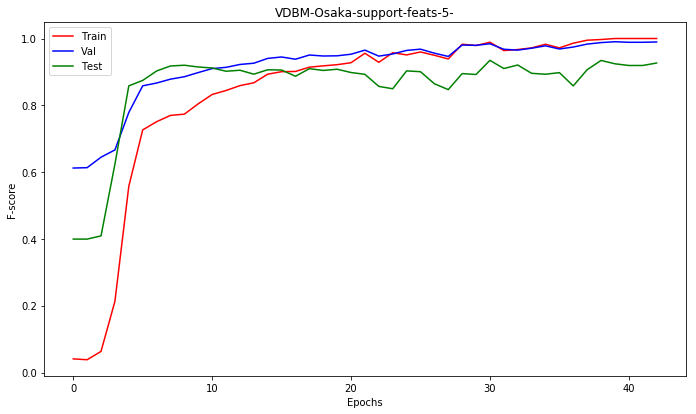

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch39========
TRAIN: (1.0, 1.0, 1.0)
VAL: (0.9861992385786802, 0.9949238578680203, 0.99034700840476)
TEST: (0.9387466440534805, 0.9104477611940298, 0.9243053027545202)
======== Detailed Results ========
               0      1      2          0          1           2          0  \
Precision    1.0    1.0    1.0   0.859375   0.958904    0.926230   0.804124   
Recall       1.0    1.0    1.0   0.948276   0.909091    0.911290   0.928571   
F-score      1.0    1.0    1.0   0.901639   0.933333    0.918699   0.861878   
Count      263.0  237.0  533.0  58.000000  77.000000  124.000000  84.000000   

                   1           2  
Precision   0.934211    0.913907  
Recall      0.835294    0.890323  
F-score     0.881988    0.901961  
Count      85.000000  155.000000  
=#==#==#==#==#=43=#==#==#==#==#=


 26%|██▋       | 272/1033 [03:40<10:16,  1.24it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 1033/1033 [13:48<00:00,  1.25it/s]


==========Epoch No:46==========
Training Loss: 1.53817415237
Train: (1.0, 1.0, 1.0, None)
               0      1      2
Precision    1.0    1.0    1.0
Recall       1.0    1.0    1.0
F-score      1.0    1.0    1.0
Count      263.0  237.0  533.0
--------
Val: (0.9061355980274898, 0.9034749034749034, 0.9039414534117315, None)
                   0          1           2
Precision   0.830769   0.945946    0.916667
Recall      0.931034   0.909091    0.887097
F-score     0.878049   0.927152    0.901639
Count      58.000000  77.000000  124.000000
--------
Test: (0.8891813891813891, 0.8827160493827161, 0.8836544047037772, None)
                   0          1           2
Precision   0.787879   0.935065    0.918919
Recall      0.928571   0.847059    0.877419
F-score     0.852459   0.888889    0.897690
Count      84.000000  85.000000  155.000000




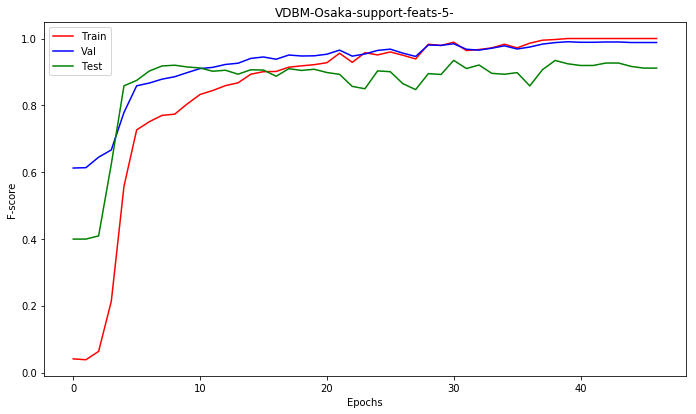

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch39========
TRAIN: (1.0, 1.0, 1.0)
VAL: (0.9861992385786802, 0.9949238578680203, 0.99034700840476)
TEST: (0.9387466440534805, 0.9104477611940298, 0.9243053027545202)
======== Detailed Results ========
               0      1      2          0          1           2          0  \
Precision    1.0    1.0    1.0   0.859375   0.958904    0.926230   0.804124   
Recall       1.0    1.0    1.0   0.948276   0.909091    0.911290   0.928571   
F-score      1.0    1.0    1.0   0.901639   0.933333    0.918699   0.861878   
Count      263.0  237.0  533.0  58.000000  77.000000  124.000000  84.000000   

                   1           2  
Precision   0.934211    0.913907  
Recall      0.835294    0.890323  
F-score     0.881988    0.901961  
Count      85.000000  155.000000  
=#==#==#==#==#=47=#==#==#==#==#=


100%|██████████| 1033/1033 [13:49<00:00,  1.25it/s]


==========Epoch No:47==========
Training Loss: 1.37693977356
Train: (1.0, 1.0, 1.0, None)
               0      1      2
Precision    1.0    1.0    1.0
Recall       1.0    1.0    1.0
F-score      1.0    1.0    1.0
Count      263.0  237.0  533.0
--------
Val: (0.9061355980274898, 0.9034749034749034, 0.9039414534117315, None)
                   0          1           2
Precision   0.830769   0.945946    0.916667
Recall      0.931034   0.909091    0.887097
F-score     0.878049   0.927152    0.901639
Count      58.000000  77.000000  124.000000
--------
Test: (0.8914841275952389, 0.8858024691358025, 0.8866570478906559, None)
                   0          1           2
Precision   0.795918   0.935897    0.918919
Recall      0.928571   0.858824    0.877419
F-score     0.857143   0.895706    0.897690
Count      84.000000  85.000000  155.000000




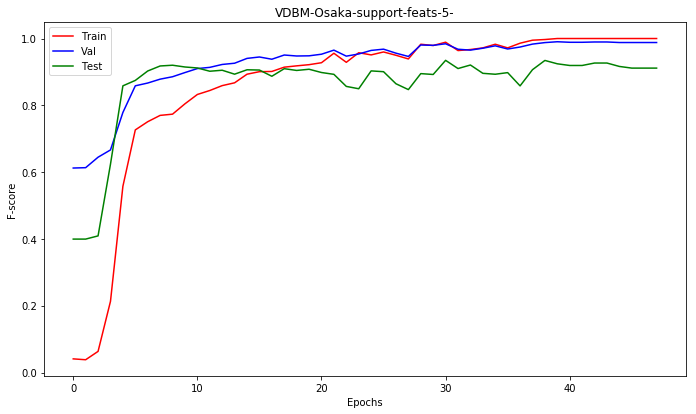

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch39========
TRAIN: (1.0, 1.0, 1.0)
VAL: (0.9861992385786802, 0.9949238578680203, 0.99034700840476)
TEST: (0.9387466440534805, 0.9104477611940298, 0.9243053027545202)
======== Detailed Results ========
               0      1      2          0          1           2          0  \
Precision    1.0    1.0    1.0   0.859375   0.958904    0.926230   0.804124   
Recall       1.0    1.0    1.0   0.948276   0.909091    0.911290   0.928571   
F-score      1.0    1.0    1.0   0.901639   0.933333    0.918699   0.861878   
Count      263.0  237.0  533.0  58.000000  77.000000  124.000000  84.000000   

                   1           2  
Precision   0.934211    0.913907  
Recall      0.835294    0.890323  
F-score     0.881988    0.901961  
Count      85.000000  155.000000  
=#==#==#==#==#=48=#==#==#==#==#=


100%|██████████| 1033/1033 [13:46<00:00,  1.25it/s]


==========Epoch No:48==========
Training Loss: 1.24364638329
Train: (1.0, 1.0, 1.0, None)
               0      1      2
Precision    1.0    1.0    1.0
Recall       1.0    1.0    1.0
F-score      1.0    1.0    1.0
Count      263.0  237.0  533.0
--------
Val: (0.9022884557131133, 0.8996138996138996, 0.9000531584702813, None)
                   0          1           2
Precision   0.830769   0.945205    0.909091
Recall      0.931034   0.896104    0.887097
F-score     0.878049   0.920000    0.897959
Count      58.000000  77.000000  124.000000
--------
Test: (0.8914841275952389, 0.8858024691358025, 0.8866570478906559, None)
                   0          1           2
Precision   0.795918   0.935897    0.918919
Recall      0.928571   0.858824    0.877419
F-score     0.857143   0.895706    0.897690
Count      84.000000  85.000000  155.000000




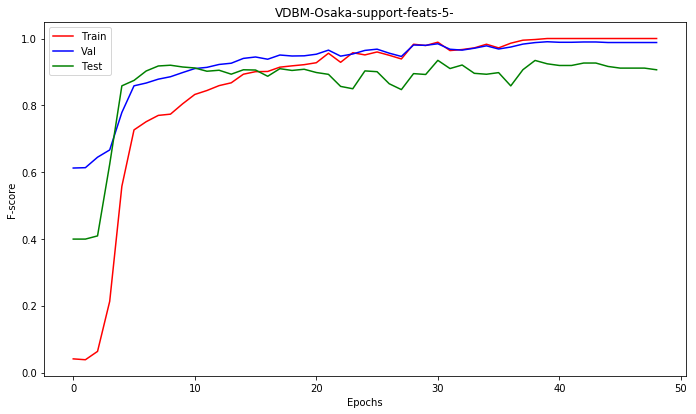

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch39========
TRAIN: (1.0, 1.0, 1.0)
VAL: (0.9861992385786802, 0.9949238578680203, 0.99034700840476)
TEST: (0.9387466440534805, 0.9104477611940298, 0.9243053027545202)
======== Detailed Results ========
               0      1      2          0          1           2          0  \
Precision    1.0    1.0    1.0   0.859375   0.958904    0.926230   0.804124   
Recall       1.0    1.0    1.0   0.948276   0.909091    0.911290   0.928571   
F-score      1.0    1.0    1.0   0.901639   0.933333    0.918699   0.861878   
Count      263.0  237.0  533.0  58.000000  77.000000  124.000000  84.000000   

                   1           2  
Precision   0.934211    0.913907  
Recall      0.835294    0.890323  
F-score     0.881988    0.901961  
Count      85.000000  155.000000  
=#==#==#==#==#=49=#==#==#==#==#=


 36%|███▌      | 374/1033 [05:04<08:55,  1.23it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 1033/1033 [13:51<00:00,  1.24it/s]


==========Epoch No:52==========
Training Loss: 0.884057283401
Train: (1.0, 1.0, 1.0, None)
               0      1      2
Precision    1.0    1.0    1.0
Recall       1.0    1.0    1.0
F-score      1.0    1.0    1.0
Count      263.0  237.0  533.0
--------
Val: (0.898494657511051, 0.8957528957528957, 0.8961506463552625, None)
                   0          1           2
Precision   0.830769   0.944444    0.901639
Recall      0.931034   0.883117    0.887097
F-score     0.878049   0.912752    0.894309
Count      58.000000  77.000000  124.000000
--------
Test: (0.88408695007671, 0.8796296296296297, 0.8801058280226435, None)
                   0          1           2
Precision   0.804124   0.923077    0.906040
Recall      0.928571   0.847059    0.870968
F-score     0.861878   0.883436    0.888158
Count      84.000000  85.000000  155.000000




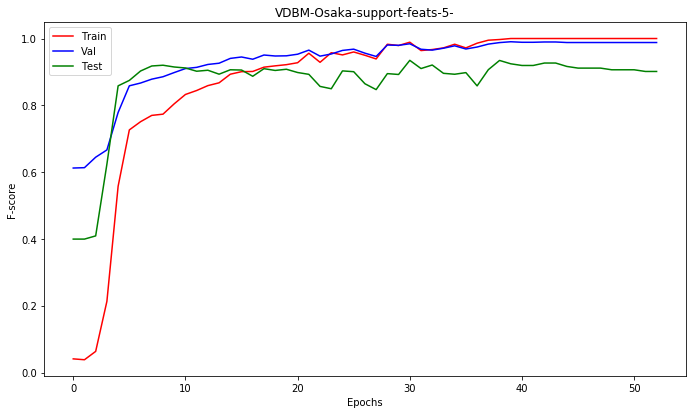

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch39========
TRAIN: (1.0, 1.0, 1.0)
VAL: (0.9861992385786802, 0.9949238578680203, 0.99034700840476)
TEST: (0.9387466440534805, 0.9104477611940298, 0.9243053027545202)
======== Detailed Results ========
               0      1      2          0          1           2          0  \
Precision    1.0    1.0    1.0   0.859375   0.958904    0.926230   0.804124   
Recall       1.0    1.0    1.0   0.948276   0.909091    0.911290   0.928571   
F-score      1.0    1.0    1.0   0.901639   0.933333    0.918699   0.861878   
Count      263.0  237.0  533.0  58.000000  77.000000  124.000000  84.000000   

                   1           2  
Precision   0.934211    0.913907  
Recall      0.835294    0.890323  
F-score     0.881988    0.901961  
Count      85.000000  155.000000  
=#==#==#==#==#=53=#==#==#==#==#=


100%|██████████| 1033/1033 [13:52<00:00,  1.24it/s]


==========Epoch No:53==========
Training Loss: 0.822102546692
Train: (1.0, 1.0, 1.0, None)
               0      1      2
Precision    1.0    1.0    1.0
Recall       1.0    1.0    1.0
F-score      1.0    1.0    1.0
Count      263.0  237.0  533.0
--------
Val: (0.8940562011034164, 0.8918918918918919, 0.8922821810786624, None)
                   0          1           2
Precision   0.828125   0.931507    0.901639
Recall      0.913793   0.883117    0.887097
F-score     0.868852   0.906667    0.894309
Count      58.000000  77.000000  124.000000
--------
Test: (0.88408695007671, 0.8796296296296297, 0.8801058280226435, None)
                   0          1           2
Precision   0.804124   0.923077    0.906040
Recall      0.928571   0.847059    0.870968
F-score     0.861878   0.883436    0.888158
Count      84.000000  85.000000  155.000000




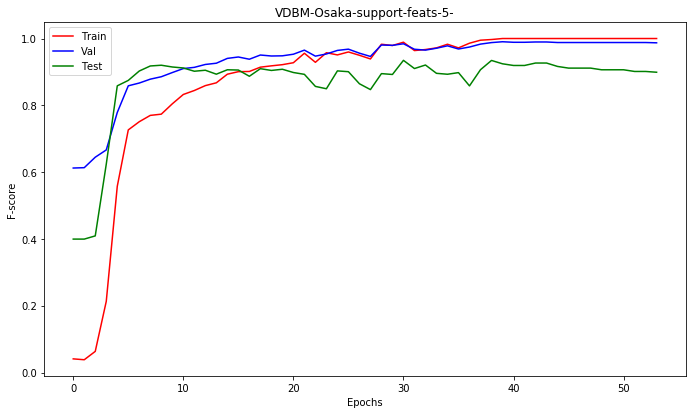

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch39========
TRAIN: (1.0, 1.0, 1.0)
VAL: (0.9861992385786802, 0.9949238578680203, 0.99034700840476)
TEST: (0.9387466440534805, 0.9104477611940298, 0.9243053027545202)
======== Detailed Results ========
               0      1      2          0          1           2          0  \
Precision    1.0    1.0    1.0   0.859375   0.958904    0.926230   0.804124   
Recall       1.0    1.0    1.0   0.948276   0.909091    0.911290   0.928571   
F-score      1.0    1.0    1.0   0.901639   0.933333    0.918699   0.861878   
Count      263.0  237.0  533.0  58.000000  77.000000  124.000000  84.000000   

                   1           2  
Precision   0.934211    0.913907  
Recall      0.835294    0.890323  
F-score     0.881988    0.901961  
Count      85.000000  155.000000  
=#==#==#==#==#=54=#==#==#==#==#=


100%|██████████| 1033/1033 [13:50<00:00,  1.24it/s]


==========Epoch No:54==========
Training Loss: 0.767518758774
Train: (1.0, 1.0, 1.0, None)
               0      1      2
Precision    1.0    1.0    1.0
Recall       1.0    1.0    1.0
F-score      1.0    1.0    1.0
Count      263.0  237.0  533.0
--------
Val: (0.8940562011034164, 0.8918918918918919, 0.8922821810786624, None)
                   0          1           2
Precision   0.828125   0.931507    0.901639
Recall      0.913793   0.883117    0.887097
F-score     0.868852   0.906667    0.894309
Count      58.000000  77.000000  124.000000
--------
Test: (0.88408695007671, 0.8796296296296297, 0.8801058280226435, None)
                   0          1           2
Precision   0.804124   0.923077    0.906040
Recall      0.928571   0.847059    0.870968
F-score     0.861878   0.883436    0.888158
Count      84.000000  85.000000  155.000000




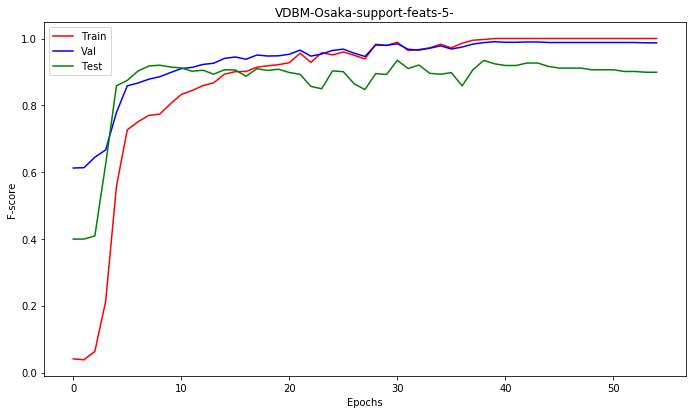

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch39========
TRAIN: (1.0, 1.0, 1.0)
VAL: (0.9861992385786802, 0.9949238578680203, 0.99034700840476)
TEST: (0.9387466440534805, 0.9104477611940298, 0.9243053027545202)
======== Detailed Results ========
               0      1      2          0          1           2          0  \
Precision    1.0    1.0    1.0   0.859375   0.958904    0.926230   0.804124   
Recall       1.0    1.0    1.0   0.948276   0.909091    0.911290   0.928571   
F-score      1.0    1.0    1.0   0.901639   0.933333    0.918699   0.861878   
Count      263.0  237.0  533.0  58.000000  77.000000  124.000000  84.000000   

                   1           2  
Precision   0.934211    0.913907  
Recall      0.835294    0.890323  
F-score     0.881988    0.901961  
Count      85.000000  155.000000  
=#==#==#==#==#=55=#==#==#==#==#=


 50%|████▉     | 516/1033 [07:05<07:06,  1.21it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 1033/1033 [13:48<00:00,  1.25it/s]


==========Epoch No:58==========
Training Loss: 0.602318048477
Train: (1.0, 1.0, 1.0, None)
               0      1      2
Precision    1.0    1.0    1.0
Recall       1.0    1.0    1.0
F-score      1.0    1.0    1.0
Count      263.0  237.0  533.0
--------
Val: (0.8896136643555999, 0.888030888030888, 0.8882980914354731, None)
                   0          1           2
Precision   0.838710   0.930556    0.888000
Recall      0.896552   0.870130    0.895161
F-score     0.866667   0.899329    0.891566
Count      58.000000  77.000000  124.000000
--------
Test: (0.88408695007671, 0.8796296296296297, 0.8801058280226435, None)
                   0          1           2
Precision   0.804124   0.923077    0.906040
Recall      0.928571   0.847059    0.870968
F-score     0.861878   0.883436    0.888158
Count      84.000000  85.000000  155.000000




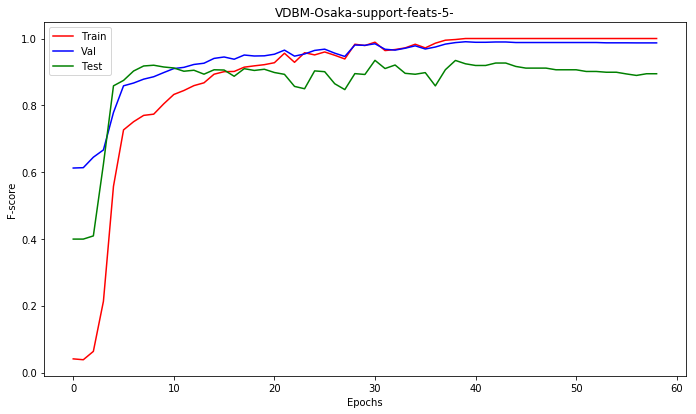

  0%|          | 0/1033 [00:00<?, ?it/s]

==========Epoch39========
TRAIN: (1.0, 1.0, 1.0)
VAL: (0.9861992385786802, 0.9949238578680203, 0.99034700840476)
TEST: (0.9387466440534805, 0.9104477611940298, 0.9243053027545202)
======== Detailed Results ========
               0      1      2          0          1           2          0  \
Precision    1.0    1.0    1.0   0.859375   0.958904    0.926230   0.804124   
Recall       1.0    1.0    1.0   0.948276   0.909091    0.911290   0.928571   
F-score      1.0    1.0    1.0   0.901639   0.933333    0.918699   0.861878   
Count      263.0  237.0  533.0  58.000000  77.000000  124.000000  84.000000   

                   1           2  
Precision   0.934211    0.913907  
Recall      0.835294    0.890323  
F-score     0.881988    0.901961  
Count      85.000000  155.000000  
=#==#==#==#==#=59=#==#==#==#==#=


100%|██████████| 1033/1033 [13:50<00:00,  1.24it/s]


==========Epoch No:59==========
Training Loss: 0.570709466934
Train: (1.0, 1.0, 1.0, None)
               0      1      2
Precision    1.0    1.0    1.0
Recall       1.0    1.0    1.0
F-score      1.0    1.0    1.0
Count      263.0  237.0  533.0
--------
Val: (0.8861999754856899, 0.8841698841698842, 0.8845542927300096, None)
                   0          1           2
Precision   0.825397   0.930556    0.887097
Recall      0.896552   0.870130    0.887097
F-score     0.859504   0.899329    0.887097
Count      58.000000  77.000000  124.000000
--------
Test: (0.88408695007671, 0.8796296296296297, 0.8801058280226435, None)
                   0          1           2
Precision   0.804124   0.923077    0.906040
Recall      0.928571   0.847059    0.870968
F-score     0.861878   0.883436    0.888158
Count      84.000000  85.000000  155.000000




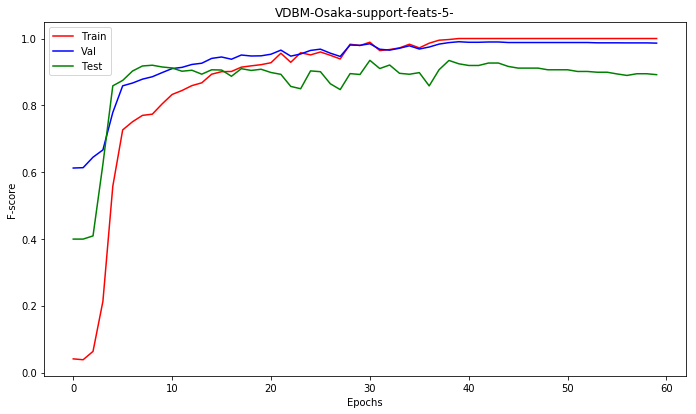

==========Epoch39========
TRAIN: (1.0, 1.0, 1.0)
VAL: (0.9861992385786802, 0.9949238578680203, 0.99034700840476)
TEST: (0.9387466440534805, 0.9104477611940298, 0.9243053027545202)
======== Detailed Results ========
               0      1      2          0          1           2          0  \
Precision    1.0    1.0    1.0   0.859375   0.958904    0.926230   0.804124   
Recall       1.0    1.0    1.0   0.948276   0.909091    0.911290   0.928571   
F-score      1.0    1.0    1.0   0.901639   0.933333    0.918699   0.861878   
Count      263.0  237.0  533.0  58.000000  77.000000  124.000000  84.000000   

                   1           2  
Precision   0.934211    0.913907  
Recall      0.835294    0.890323  
F-score     0.881988    0.901961  
Count      85.000000  155.000000  


In [8]:
start_epoch = 0
end_epoch = 60
model_name = params['model_name']
for iter_ in range(start_epoch, end_epoch):
    print "=#="*5+str(iter_)+"=#="*5
    total_loss = 0
    preds_train = []
    actual_train = []
    for each_ID in tqdm(data['train_ids']):
        model_RNN.zero_grad()
        tag_scores = model_RNN(data['data'], each_ID)
        
        _, ind_ = torch.max(tag_scores, dim=1)
        preds_train+=ind_.tolist()

        curr_labels = [data['data'][each_ID][label_ind]]
        curr_labels = [batchify.label_mapping[x] for x in curr_labels]
        actual_train+=curr_labels
        curr_labels = torch.cuda.LongTensor(curr_labels)
        curr_labels = autograd.Variable(curr_labels)
        
        loss = loss_function(tag_scores, curr_labels.reshape(tag_scores.shape[0]))
        total_loss+=loss.item()

        loss.backward()
        optimizer.step()
    
    df_tr = pd.DataFrame(list(precision_recall_fscore_support(actual_train, preds_train, 
                                                              labels = [0,1,2])),
                                                             columns = [0,1,2])
    df_tr.index = ['Precision','Recall','F-score','Count']
    prf_tr = precision_recall_fscore_support(actual_train, preds_train, average='weighted')
#     prf_tr, df_tr = evaluate_(model_RNN, data, 'train_ids')
    prf_test, df_test = eval_plot.evaluate_dbm(model_RNN, data, 'test_ids')
    prf_val, df_val = eval_plot.evaluate_dbm(model_RNN, data, 'val_ids')
    
    df_all = pd.concat([df_tr, df_val, df_test],axis=1)
    dict_df_prf_mod['Epoch'+str(iter_)] = df_all
    
    print '=='*5 + "Epoch No:"+str(iter_) +"=="*5
    print "Training Loss: "+str(total_loss)
    print "=="*4
    print "Train: " + str(prf_tr)
    print df_tr
    print "--"*4
    print "Val: " + str(prf_val)
    print df_val
    print "--"*4
    print "Test: " + str(prf_test)
    print df_test
    print '=='*40
    print '\n'
    if(save_flag):
        torch.save(model_RNN, '../../Models/'+model_name+str(iter_)+'.pt')
        pickle.dump(dict_df_prf_mod, open('../../Results/dict_prf_'+model_name+str(iter_)+'.pkl','wb'))
        eval_plot.plot_graphs(dict_df_prf_mod, 'F-score', 
                              '../../Plots/'+model_name+str(iter_)+'.png',
                              0, iter_+1, 
                              model_name)

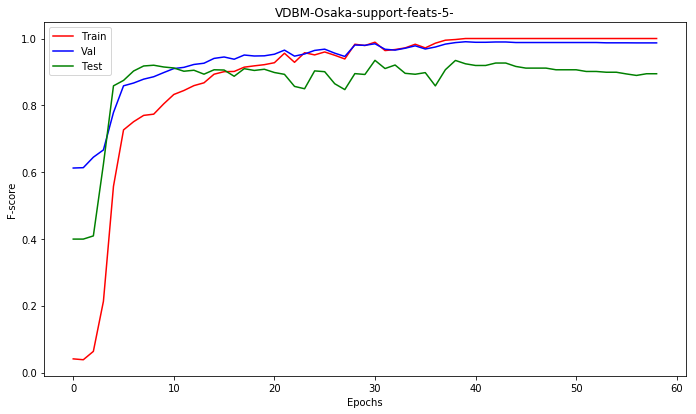

==========Epoch39========
TRAIN: (1.0, 1.0, 1.0)
VAL: (0.9861992385786802, 0.9949238578680203, 0.99034700840476)
TEST: (0.9387466440534805, 0.9104477611940298, 0.9243053027545202)
======== Detailed Results ========
               0      1      2          0          1           2          0  \
Precision    1.0    1.0    1.0   0.859375   0.958904    0.926230   0.804124   
Recall       1.0    1.0    1.0   0.948276   0.909091    0.911290   0.928571   
F-score      1.0    1.0    1.0   0.901639   0.933333    0.918699   0.861878   
Count      263.0  237.0  533.0  58.000000  77.000000  124.000000  84.000000   

                   1           2  
Precision   0.934211    0.913907  
Recall      0.835294    0.890323  
F-score     0.881988    0.901961  
Count      85.000000  155.000000  


In [9]:
        eval_plot.plot_graphs(dict_df_prf_mod, 'F-score', 
                              '../../Plots/'+model_name+str(iter_)+'.png',
                              0, iter_, 
                              model_name)